# Useful Libraries & Image manipulation

## 1. Overview

In this tutorial, we'll first go through two very important basic python libraries in the community of science, namely **Numpy** and **Matplotlib** and we'll then introduce another very convenient library for computer science called **Scipy** and learn some image operations.

## 2. Numpy

Numpy is a very popular third-party library for numerical computing, if you want to do some heavy calculation, this is the tool package you should look for. To use it, first you need to import the library into your environment so that you can refer to it, and the name is usually contracted to `np` as a tradition.

In [3]:
import numpy as np

The most basic and fundamental data type in Numpy is `Array`, it's pretty much like the list, only that it's more strict in terms of data type and more optimized, also it's multi-dimensional. To define an array is quite intuitive, we can directly define all the entries

In [5]:
my_array_1d = np.array([1,2,3])
my_array_2d = np.array([[1,2],[3,4]])
my_array_3d = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(f'1d array:\n{my_array_1d}')
print(f'2d array (matrix):\n{my_array_2d}')
print(f'3d array (like images):\n{my_array_3d}')

1d array:
[1 2 3]
2d array (matrix):
[[1 2]
 [3 4]]
3d array (like images):
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


Also because the numbers we input are all integers, the data type will be set to integer,

In [11]:
my_array_1d.dtype

dtype('int64')

In this case, if you want to assign a value to an entry, the value will be converted to the data type of the array

In [14]:
my_array_1d[0] = 5.7
print(my_array_1d)

[5 2 3]


if the conversion is not applicable, it will raise an error.

In [15]:
my_array_1d[0] = 'a'

ValueError: ignored

But we can specify the data type when initializing using the argument `dtype`

In [50]:
my_array_1d = np.array([1,2,3], dtype=np.float32)
print(my_array_1d)
print(my_array_1d.dtype)

[1. 2. 3.]
float32


We can also convert the data type later using the method `astype`

In [52]:
my_array_1d = np.array([1,2,3])
print(my_array_1d.dtype)
my_array_1d = my_array_1d.astype(np.float32)
print(my_array_1d)
print(my_array_1d.dtype)

int64
[1. 2. 3.]
float32


This is a very important flaw or feature of numpy, the built-in list in python is great for putting everything in, but it's also extremely slow, because entries are spread across the whole memory and it takes quite a while to retrieve those values. To compare, we can calculate inner product of two vectors with built-in list and numpy to see the difference.

In [31]:
import time

vec_0 = list(range(1000000))
vec_1 = list(range(1000000))
def inner_product(vec_0, vec_1):
    sum = 0
    for en1, en2 in zip(vec_0, vec_1):
        sum += en1*en2
    return sum
start_time = time.time()
ip = inner_product(vec_0, vec_1)
end_time = time.time()
print(f'inner product: {ip}, time consumed: {end_time - start_time:.3f}') # '.4f' to manage the precision of float numbers

inner product: 333332833333500000, time consumed: 0.125


In [32]:
vec_0 = np.arange(1000000)
vec_1 = np.arange(1000000)

start_time = time.time()
ip = np.inner(vec_0, vec_1)
end_time = time.time()
print(f'inner product: {ip}, time consumed: {end_time - start_time:.3f}') # '.4f' to manage the precision of float numbers

inner product: 333332833333500000, time consumed: 0.002


Numpy is a lot faster because numpy is actually written in C, which means that data are stored together in memory as a block, so that operations in Numpy can retrieve data a lot faster, and because data are handled by C, they're limited in terms of range, and if you accidentally cross that limit, the results will be no longer reliable. let's try 10 mil. 

In [34]:
vec_0 = list(range(10000000))
vec_1 = list(range(10000000))
ip_python = inner_product(vec_0, vec_1)
print(f'inner product: {ip_python}')

vec_0 = np.arange(10000000)
vec_1 = np.arange(10000000)

ip_numpy = np.inner(vec_0, vec_1)
print(f'inner product: {ip_numpy}')

inner product: 333333283333335000000
inner product: 1291890006563070912


We can see that they're no longer the same. This problem can be quite complicated and easy to overlook especially in practical situations, you just need to keep in mind that there's always possibility that the results returned from numpy (or pytorch, because they're all written in C) can be faulty.

In [35]:
(333333283333335000000 - 1291890006563070912)/(2**64)

18.0

In [36]:
a = np.array([127], dtype=np.int8)
print(f'a before: {a}')
a += 1
print(f'a after: {a}')

a before: [127]
a after: [-128]


We can also sample from some distribution, for example, we can generate tensors with entries sampled from uniform distribution

In [8]:
np.random.rand(4,5) # sample 4*5=20 real numbers from a uniform distribution over [0, 1) and shape these numbers into a 4*5 array

array([[0.08454988, 0.78196435, 0.79305092, 0.93931416, 0.5207773 ],
       [0.11179867, 0.40109425, 0.6108719 , 0.53422952, 0.47465802],
       [0.18646643, 0.51529924, 0.86063331, 0.63762899, 0.23131881],
       [0.93056884, 0.84685501, 0.35596064, 0.7681917 , 0.40479007]])

Or from normal distribution

In [7]:
np.random.normal(0,1, (3,4)) # sample 3*4=12 real numbers from a Gaussian distribution with mean=0 and std=1, and shape them into a 3*4 array

array([[ 0.67598108,  1.73593619,  0.11750026, -0.76579014],
       [ 0.77253795,  0.30771123,  1.00809862,  1.30822856],
       [ 0.03974791,  0.21707695, -0.20584046, -0.9942345 ]])

Or other simple initialization functions

In [64]:
print(f'array of zeros:\n{np.zeros((4,4))}')
print(f'array of ones:\n{np.ones((2,3))}')
print(f'array of 7s:\n{np.full((3,3),7)}')

array of zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
array of ones:
[[1. 1. 1.]
 [1. 1. 1.]]
array of 7s:
[[7 7 7]
 [7 7 7]
 [7 7 7]]


In case you want to pick out a part of the array, you can use slicing

we can pick out some specific rows and columns

In [45]:
my_array = np.arange(16).reshape(4,4)
print(f'original array:\n{my_array}')
print(f'picking out the first row:\n{my_array[0,:]}') # ':' will be replaced with all possible values applicable, in this case, 0,1,2,3
print(f'picking out the second column:\n{my_array[:,1]}')

original array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
picking out the first row:
[0 1 2 3]
picking out the second column:
[ 1  5  9 13]


We can further decorate `:` with optional starting and ending indexes, we can pick out the cube in the middle

In [39]:
print(f'picking out the cube in the middle:\n{my_array[1:3,1:3]}')

picking out the cube in the middle:
[[ 5  6]
 [ 9 10]]


We can always reshape the array to sizes we want

In [54]:
cube_array = np.arange(4).reshape(2,2)
print(cube_array)
flattened_array = cube_array.reshape(4)
print(flattened_array)

[[0 1]
 [2 3]]
[0 1 2 3]


We can also tranpose the matrix

In [46]:
my_array_transposed = my_array.transpose()
print(f'transposed array:\n{my_array_transposed}')

transposed array:
[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]


A weird thing with this though, is that we can see that `my_array` and `my_array_transposed` are two different arrays here, but if we change an entry in `my_array`, the change will reflect on `my_array_transposed`

In [47]:
my_array[0][0] = 1
print(f'my_array_transposed after:\n{my_array_transposed}')

my_array_transposed after:
[[ 1  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]


This is because the `transpose` method didn't return a brand new array, but one shares the same memory with the old one only with a different style to display. To completely copy a new array, we need to use the method `copy`.

In [49]:
my_array = np.arange(3)
cloned_array = my_array.copy()
print(f'my_array before:\n{my_array}')
print(f'cloned_array before:\n{cloned_array}')
my_array[0] = 1
print(f'my_array after:\n{my_array}')
print(f'cloned_array after:\n{cloned_array}')

my_array before:
[0 1 2]
cloned_array before:
[0 1 2]
my_array after:
[1 1 2]
cloned_array after:
[0 1 2]


There's a bunch of other useful operations, we can sum the array using method `sum`

In [55]:
my_array = np.array([1,2,3])
print(f'sum of my_array: {my_array.sum()}')

sum of my_array: 6


We can even sum along a specific dimension

In [57]:
my_array = np.arange(4).reshape(2,2)
print(my_array)
print(f'sum along the first dimension:\n{my_array.sum(axis=0)}')

[[0 1]
 [2 3]]
sum along the first dimension:
[2 4]


Matrix multiplication:

In [60]:
m = np.array([[1,2],[3,4]])
v = np.array([5,6])

print(f'{m}\n*\n{v}\n=\n{np.matmul(m,v)}')

[[1 2]
 [3 4]]
*
[5 6]
=
[17 39]


## 3. Matplotlib

Matplotlib is a third-party library to draw differnt types of plots, including images. If you run matplotlib command on your own computer, it will provoke another process to show you the graphics, but here on the webpage, it's slightly differnt, we need to run `%matplotlib inline` first to make those plots appear later.

In [65]:
%matplotlib inline

Let's get to the simplest 2d plots, first we need some data, here we have the temperature **anomaly** trend in nsw & vic found on a government website. We can use the shell command `curl` to download them and save them to files `nsw_temp` and `vic_temp` respectively.

In [66]:
!curl http://www.bom.gov.au/web01/ncc/www/cli_chg/timeseries/tmean/0112/nsw/latest.txt > nsw_temp
!curl http://www.bom.gov.au/web01/ncc/www/cli_chg/timeseries/tmean/0112/vic/latest.txt > vic_temp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2331  100  2331    0     0   1308      0  0:00:01  0:00:01 --:--:--  1308
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2331  100  2331    0     0   6283      0 --:--:-- --:--:-- --:--:--  6266


We can use shell command `head` to see what's inside the file

In [67]:
!head -10 nsw_temp

191001191012   -0.35
191101191112   -0.78
191201191212   -0.09
191301191312   -0.37
191401191412    1.02
191501191512    0.17
191601191612   -0.54
191701191712   -1.04
191801191812   -0.47
191901191912    0.68


We can see the file consists of multiple lines, each has the date and the corresponding temperature at that time, let's load these files into python

In [69]:
next(iter(open('nsw_temp', 'rt'))).strip().split()

['191001191012', '-0.35']

In [74]:
class RegionTemp:
    def __init__(self, file_location):
        self.data = []
        with open(file_location, 'rt') as file:
            for line in file:
                date, temp = line.strip().split()
                self.data.append([int(date[:4]), float(temp)])
    
    def __getitem__(self, idx):
        return self.data[idx]

nsw_temp= RegionTemp('nsw_temp')
vic_temp = RegionTemp('vic_temp')
print(f'The average temperature in {nsw_temp[0][0]} was {nsw_temp[0][1]} C')

The average temperature in 1910 was -0.35 C


Since we got all the data in our hand, we can draw the plots

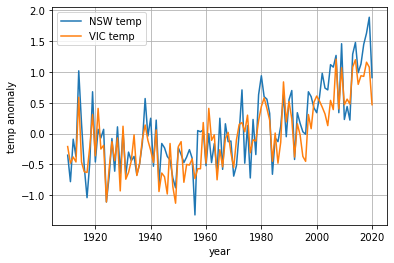

In [78]:
import matplotlib.pyplot as plt # it's a tradition to use 'plt' as the alias

plt.plot([item[0] for item in nsw_temp], [item[1] for item in nsw_temp], label='NSW temp')
plt.plot([item[0] for item in nsw_temp], [item[1] for item in vic_temp], label='VIC temp')

plt.xlabel('year')
plt.ylabel('temp anomaly')
plt.grid() # to add grid
plt.legend() # to add labels
plt.show()

We can also display images downloaded. Like previously, we can use `curl` to download images

In [80]:
!curl https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png > lenna.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  462k  100  462k    0     0  1606k      0 --:--:-- --:--:-- --:--:-- 1606k


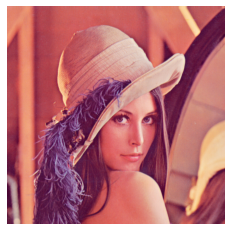

In [82]:
image = plt.imread('lenna.png')
plt.axis('off')
plt.imshow(image)

You can also display multiple images or plots at once using `subplots`

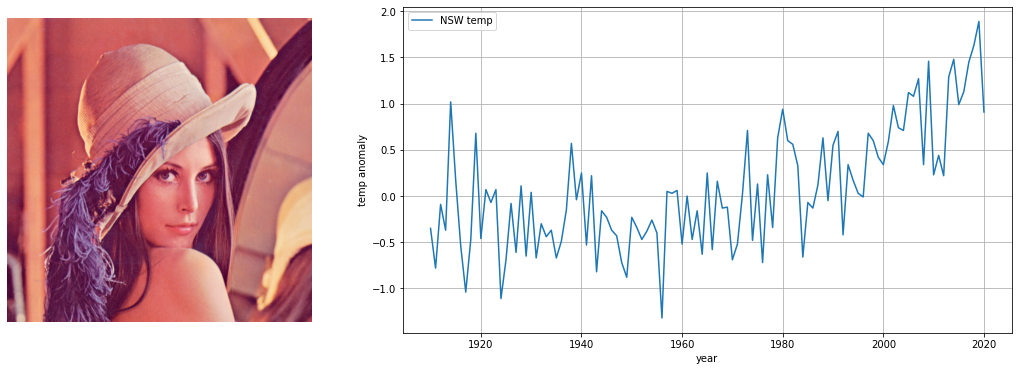

In [90]:
fig, axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 2]})
fig.set_figheight(6)
fig.set_figwidth(18)
axes[0].imshow(image)
axes[0].axis('off')
axes[1].plot([item[0] for item in nsw_temp], [item[1] for item in nsw_temp], label='NSW temp')
axes[1].set_xlabel('year')
axes[1].set_ylabel('temp anomaly')
axes[1].grid()
axes[1].legend()
plt.show()

And because images are just arrays like matrices

In [91]:
print(image.shape)

(512, 512, 3)


you can certainly "make" images if you want

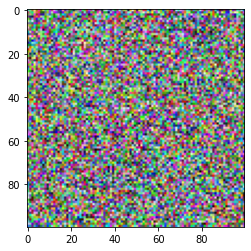

In [92]:
noise_image = np.random.rand(100,100,3)

plt.imshow(noise_image)

## 4. Image denoising & blurring using Scipy

Scipy is another third-party library for scientific computing, it includes many traditional computer science algorithms, not just machine learning, and it certainly includes some image denoising & blurring algorithms that we can try out.

First let's construct a noisy image from the `lenna.png` and randomly generated uniform noise

In [98]:
0.1*image.std()*np.random.random(image.shape)[:2,:2,:]

array([[[0.01416984, 0.01826141, 0.00046211],
        [0.01780242, 0.00473663, 0.01620865]],

       [[0.01066367, 0.01670256, 0.0027261 ],
        [0.0196998 , 0.01225214, 0.00445385]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'noisy')

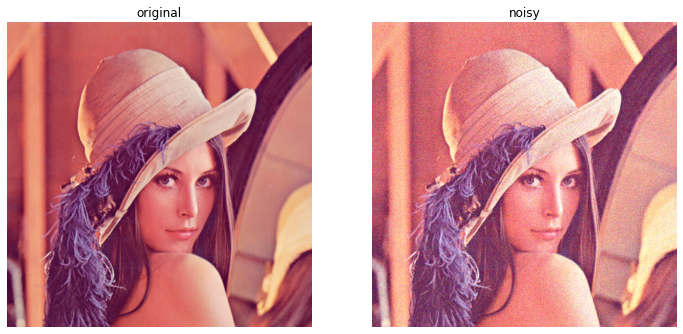

In [104]:
noisy_image = image + image.std()*np.random.random(image.shape)
fig, axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('original')

axes[1].imshow(noisy_image)
axes[1].axis('off')
axes[1].set_title('noisy')

We're going to try two simple denoising methods, `Gaussian filter` and `Median filter`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'median denoised')

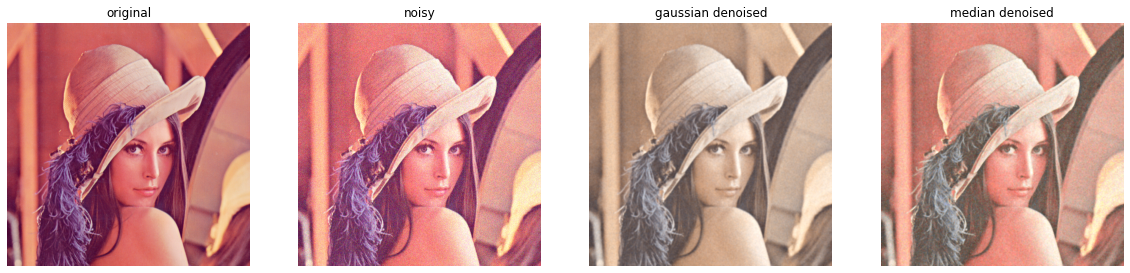

In [113]:
import scipy.ndimage
gauss_denoised_image = scipy.ndimage.gaussian_filter(noisy_image, 1)
median_denoised_image = scipy.ndimage.median_filter(noisy_image, 3)

fig, axes = plt.subplots(1,4)
fig.set_figheight(5)
fig.set_figwidth(20)
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('original')

axes[1].imshow(noisy_image)
axes[1].axis('off')
axes[1].set_title('noisy')

axes[2].imshow(gauss_denoised_image)
axes[2].axis('off')
axes[2].set_title('gaussian denoised')

axes[3].imshow(median_denoised_image)
axes[3].axis('off')
axes[3].set_title('median denoised')

The gaussian filter can be used as a method of denoising, but when the arguments are correct, it can also be used as a blurring method

Text(0.5, 1.0, 'blurred')

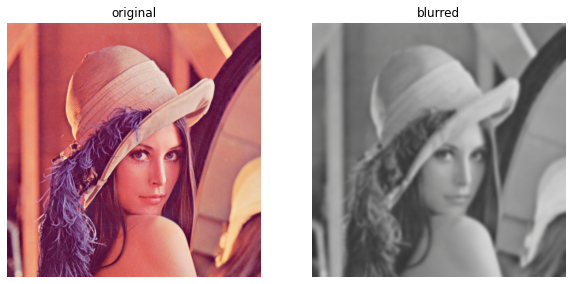

In [117]:
gauss_blurred_image = scipy.ndimage.gaussian_filter(image, 3)
fig, axes = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('original')

axes[1].imshow(gauss_blurred_image)
axes[1].axis('off')
axes[1].set_title('blurred')

There're many more out of the box image manipulation methods you can explore, there's also another library called openCV which is broadly used in computer vision and computer graphics. Next time, we'll use Fourier Transformation to denoise/compress the image, which can be a little more complicated, we'll also start introducing pytorch.